<a href="https://colab.research.google.com/github/juliotorresma/Materia_MachineLearning/blob/main/Projecto_ML_Parcial1_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PASOS A REALIZAR:

1.-CARGAR DATASETS

2.-QUITAR PIXELES BLANCOS

3.-CREAR MODELO DE RED NEURONAL

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Para futuros pasos guardamos la direccion de acceso a cada carpeta
TRAIN_PATH = "/content/gdrive/MyDrive/billetes/train"
VAL_PATH = "/content/gdrive/MyDrive/billetes/test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import tensorflow as tf 




In [128]:

model = tf.keras.models.Sequential()

#Primera Capa
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(2,2))


model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(Dropout(0.25))

model.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax)) 

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 110, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 26, 26, 64)       

In [130]:
# Train from scratch
train_datagen = image.ImageDataGenerator(rescale = 1./255)
test_dataset = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/billetes/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode='categorical')

Found 284 images belonging to 5 classes.


In [131]:
train_generator.class_indices

{'100_train': 0, '200_train': 1, '20_train': 2, '500_train': 3, '50_train': 4}

In [132]:
validation_generator = test_dataset.flow_from_directory(
    '/content/gdrive/MyDrive/billetes/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode='categorical')

Found 111 images belonging to 5 classes.


In [133]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 4s 851ms/step - loss: 1.7505 - accuracy: 0.1598 - val_loss: 0.6966 - val_accuracy: 0.1875
Epoch 2/10
5/5 [==============================] - 3s 723ms/step - loss: 1.0059 - accuracy: 0.2057 - val_loss: 0.4899 - val_accuracy: 0.2656
Epoch 3/10
5/5 [==============================] - 3s 715ms/step - loss: 0.5115 - accuracy: 0.2009 - val_loss: 0.4946 - val_accuracy: 0.1875
Epoch 4/10
5/5 [==============================] - 3s 723ms/step - loss: 0.4962 - accuracy: 0.1555 - val_loss: 0.4841 - val_accuracy: 0.2500
Epoch 5/10
5/5 [==============================] - 3s 711ms/step - loss: 0.4762 - accuracy: 0.3783 - val_loss: 0.4450 - val_accuracy: 0.5625
Epoch 6/10
5/5 [==============================] - 3s 719ms/step - loss: 0.4538 - accuracy: 0.3672 - val_loss: 0.4410 - val_accuracy: 0.6562
Epoch 7/10
5/5 [==============================] - 3s 727ms/step - loss: 0.4174 - accuracy: 0.4864 - val_loss: 0.3671 - val_accuracy: 0.6094
Epoch 8/10
5/5 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3]


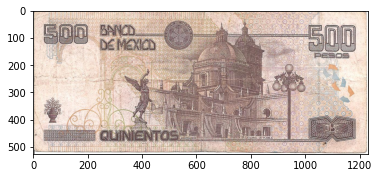

Tu prediccion fue un billete de quinientos
[4]


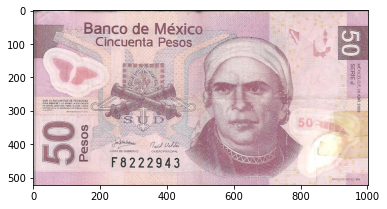

Tu prediccion fue un billete de cincuenta
[0]


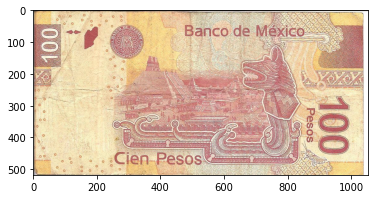

Tu prediccion fue un billete de cien
[3]


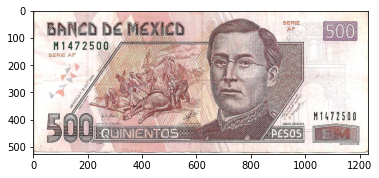

Tu prediccion fue un billete de quinientos
[3]


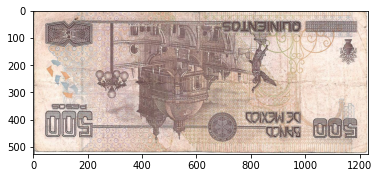

Tu prediccion fue un billete de quinientos
[4]


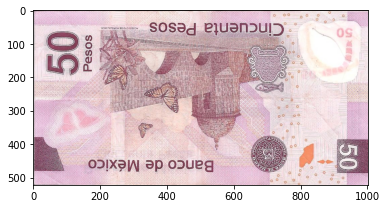

Tu prediccion fue un billete de cincuenta
[2]


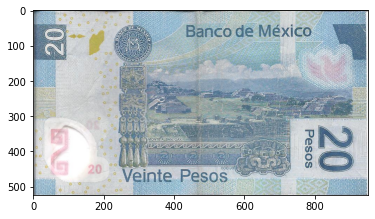

Tu prediccion fue un billete de veinte
[4]


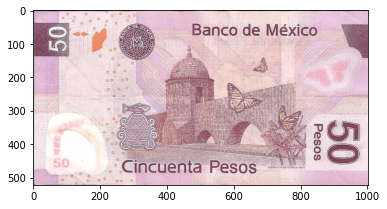

Tu prediccion fue un billete de cincuenta
[2]


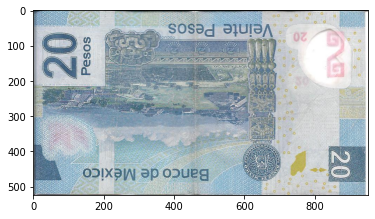

Tu prediccion fue un billete de veinte
[0]


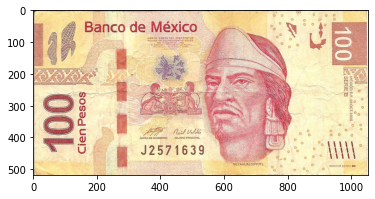

Tu prediccion fue un billete de cien
[2]


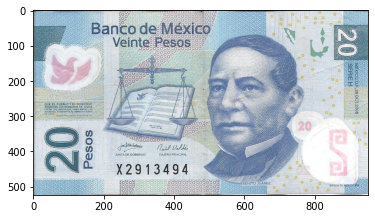

Tu prediccion fue un billete de veinte


In [135]:
import cv2
import matplotlib.image as mpimg
class_name = ['cien', 'doscientos', 'veinte', 'quinientos', 'cincuenta']

for i in range(2,13):

  imagen_prueba = "/content/"+str(i)+".JPG"

  img = cv2.imread(imagen_prueba)

  img = cv2.resize(img,(224,224))

  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #         Col de valores   Tamaño de imagen   Numero de canales de colores
  img = np.reshape(img,[1,      224,224,                3])
  prediccion = model.predict_classes(img)

  
  imagen_mostrar = cv2.imread(imagen_prueba)
  imagen_mostrar = cv2.cvtColor(imagen_mostrar,cv2.COLOR_BGR2RGB)
  print(prediccion)

  plt.imshow(imagen_mostrar)
  plt.show()
  print("Tu prediccion fue un billete de",class_name[prediccion[0]])